# Create a plot to compare WT vs translated structure and stability

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
import json
import optuna
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')
from optuna.storages import JournalStorage, JournalFileStorage

### Get energies, stds, structures

In [2]:
with open('../data/proof_of_principle/enh1_vs_consensus_in_silico_estimator_out.json', 'r') as f:
    data = json.load(f)
    wt_e = data['enh']
    cons_e = data['consensus-hd']
cons_struct = '../data/pdbs/consensus_homeodomain.pdb'

In [3]:
cons_storage = JournalStorage(JournalFileStorage('../tmp/optimize_consensus/optuna.log'))
cons_study  = optuna.load_study(study_name="enh_vs_consensus", storage=cons_storage)

/tmp/ipykernel_93911/1595419307.py:1: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  cons_storage = JournalStorage(JournalFileStorage('../tmp/optimize_consensus/optuna.log'))


In [4]:
cons_study_df = cons_study.trials_dataframe()

In [5]:
cons_study_df

,number,value,datetime_start,datetime_complete,duration,params_mut_0,params_mut_1,params_mut_13,params_mut_14,params_mut_16,...,params_mut_52,params_mut_56,params_mut_6,params_mut_8,params_mut_9,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_nsga2:generation,state
0,0,-2.526263,2023-09-08 16:34:08.351411,2023-09-08 17:54:48.736191,0 days 01:20:40.384780,True,False,False,True,True,...,True,False,False,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.526262918222819, 0.04159046136211628]",KRPRTAFSKEQLAELEREFEKNRYLSAERREELASKLGLTERQVKI...,0,COMPLETE
1,1,-2.515767,2023-09-08 16:34:08.351615,2023-09-08 17:54:48.028537,0 days 01:20:39.676922,True,False,False,True,True,...,True,False,False,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.515766901716204, 0.045855886607824324]",KRPRTAFSKEQLAELEREFEKNRYLSAERREELASKLGLTERQVKI...,0,COMPLETE
2,2,NaN,2023-09-08 16:34:08.351805,2023-09-08 16:34:16.418258,0 days 00:00:08.066453,True,False,False,True,True,...,True,False,False,False,True,NaN,NaN,NaN,0,PRUNED
3,3,NaN,2023-09-08 16:34:08.351489,2023-09-08 16:34:17.272229,0 days 00:00:08.920740,True,False,False,True,True,...,True,False,False,False,True,NaN,NaN,NaN,0,PRUNED
4,4,NaN,2023-09-08 16:34:08.351475,2023-09-08 16:34:18.732333,0 days 00:00:10.380858,True,False,False,True,True,...,True,False,False,False,True,NaN,NaN,NaN,0,PRUNED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,252,-2.621630,2023-09-09 11:44:40.508338,2023-09-09 13:03:44.106054,0 days 01:19:03.597716,False,False,True,True,True,...,False,False,True,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.62162979722702, 0.05642086260751225]",DKRKRTTFSSEQLEELEELFEENRYPSARERQQLAKKLGLNEAQVK...,6,COMPLETE
253,253,NaN,2023-09-09 12:29:47.024327,2023-09-09 12:29:49.665344,0 days 00:00:02.641017,True,False,True,True,True,...,False,False,True,False,False,NaN,NaN,NaN,6,PRUNED
254,254,NaN,2023-09-09 12:29:49.671763,2023-09-09 12:29:55.503394,0 days 00:00:05.831631,False,False,True,True,True,...,False,False,True,False,False,NaN,NaN,NaN,6,PRUNED
255,255,NaN,2023-09-09 12:29:55.509916,2023-09-09 12:29:58.576120,0 days 00:00:03.066204,True,False,True,True,True,...,False,False,True,False,False,NaN,NaN,NaN,6,PRUNED


## the random run

In [6]:
rand_storage = JournalStorage(JournalFileStorage('../tmp/optimize_random/optuna.log'))
rand_study  = optuna.load_study(study_name="enh_vs_random", storage=rand_storage)

/tmp/ipykernel_93911/2205900362.py:1: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  rand_storage = JournalStorage(JournalFileStorage('../tmp/optimize_random/optuna.log'))


In [7]:
rand_study_df = rand_study.trials_dataframe()

In [8]:
rand_study_df

,number,value,datetime_start,datetime_complete,duration,params_mut_11,params_mut_15,params_mut_18,params_mut_20,params_mut_22,...,params_mut_35,params_mut_48,params_mut_50,params_mut_6,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_fixed_params,system_attrs_nsga2:generation,state
0,0,-2.335410,2023-09-14 09:39:20.882613,2023-09-14 09:39:52.457620,0 days 00:00:31.575007,False,False,False,False,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3354098826575087, 0.060888904369825705]",DKRPRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_3': False, 'mut_6': False, 'mut_11': Fal...",NaN,COMPLETE
1,1,-0.962596,2023-09-14 09:39:20.899374,2023-09-14 11:02:06.412613,0 days 01:22:45.513239,True,True,True,True,True,...,True,True,True,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-0.9625957474123082, 0.12748148917515126]",DKRVRTLFSSECLARCKRWFVECRYLTERRDDMLDEELGLNEAQIK...,"{'mut_3': True, 'mut_6': True, 'mut_11': True,...",NaN,COMPLETE
2,2,-2.376277,2023-09-14 09:39:20.901553,2023-09-14 11:28:07.160407,0 days 01:48:46.258854,False,False,False,False,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.376276907842699, 0.05108835869015421]",DKRVRTAFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_3': True, 'mut_6': False, 'mut_11': Fals...",NaN,COMPLETE
3,3,-2.361023,2023-09-14 09:39:20.924279,2023-09-14 10:59:37.083936,0 days 01:20:16.159657,False,False,False,False,False,...,False,False,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.361023071226634, 0.053535063461086566]",DKRPRTLFSSEQLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_3': False, 'mut_6': True, 'mut_11': Fals...",NaN,COMPLETE
4,4,-2.045751,2023-09-14 09:39:20.942289,2023-09-14 10:59:49.162427,0 days 01:20:28.220138,True,False,False,False,False,...,False,False,False,False,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.045750958349434, 0.09374204717096007]",DKRPRTAFSSECLARLKREFNENRYLTERRRQQLSSELGLNEAQIK...,"{'mut_3': False, 'mut_6': False, 'mut_11': Tru...",NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,NaN,2023-09-15 05:24:08.947012,2023-09-15 05:24:09.222083,0 days 00:00:00.275071,False,False,False,False,False,...,False,False,False,True,NaN,NaN,NaN,NaN,5.0,PRUNED
264,264,NaN,2023-09-15 05:24:09.235452,2023-09-15 05:24:18.040043,0 days 00:00:08.804591,False,False,False,False,False,...,False,False,False,True,NaN,NaN,NaN,NaN,5.0,PRUNED
265,265,NaN,2023-09-15 05:24:18.045761,2023-09-15 05:24:26.771407,0 days 00:00:08.725646,False,False,False,False,False,...,False,False,False,True,NaN,NaN,NaN,NaN,5.0,PRUNED
266,266,NaN,2023-09-15 05:24:26.779340,2023-09-15 05:24:32.949083,0 days 00:00:06.169743,False,False,False,True,False,...,False,False,False,True,NaN,NaN,NaN,NaN,5.0,PRUNED


In [9]:
rand_e = rand_study_df.loc[1, 'user_attrs_raw_result']
rand_struct = rand_study_df.loc[1, 'user_attrs_pdb_file']+'/ensemble_replicate_0.pdb'
wt_struct = rand_study_df.loc[0, 'user_attrs_pdb_file']+'/ensemble_replicate_0.pdb'

In [10]:
rand_e_best = rand_study.best_trial.user_attrs['raw_result']
rand_struct_best = rand_study.best_trial.user_attrs['pdb_file']+'/ensemble_replicate_0.pdb'

### The translated seq

In [11]:
with open('../data/enh/translated_energy_enh1.json', 'r') as f:
    data = json.load(f)
    trans_e = data['trans']
trans_struct = '../data/enh/initial_estimate/trans/ensemble_replicate_0.pdb'

In [12]:
opt_storage = JournalStorage(JournalFileStorage('../data/enh/optimize_enh1/optuna.log'))
opt_study  = optuna.load_study(study_name="enh_vs_translate", storage=opt_storage)
opt_study_df = opt_study.trials_dataframe()

/tmp/ipykernel_93911/787137964.py:1: ExperimentalWarning: JournalStorage is experimental (supported from v3.1.0). The interface can change in the future.
  opt_storage = JournalStorage(JournalFileStorage('../data/enh/optimize_enh1/optuna.log'))


In [13]:
opt_study_df

,number,value,datetime_start,datetime_complete,duration,params_mut_0,params_mut_13,params_mut_17,params_mut_20,params_mut_21,...,params_mut_42,params_mut_55,params_mut_58,params_mut_8,params_mut_9,user_attrs_pdb_file,user_attrs_raw_result,user_attrs_variant_seq,system_attrs_nsga2:generation,state
0,0,-2.348217,2023-08-24 10:48:00.841757,2023-08-24 12:09:27.322891,0 days 01:21:26.481134,False,False,True,True,True,...,True,False,False,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.3482165290751595, 0.06545840526291054]",DKRPRTAFSAEQLARLKAEFQANRYLTERRRQQLASELGLNESQIK...,0,COMPLETE
1,1,NaN,2023-08-24 10:48:00.859014,2023-08-24 10:48:10.743798,0 days 00:00:09.884784,False,False,True,True,True,...,True,False,False,False,True,NaN,NaN,NaN,0,PRUNED
2,2,-2.350433,2023-08-24 10:48:00.857022,2023-08-24 12:09:08.834185,0 days 01:21:07.977163,False,False,True,True,True,...,True,False,False,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.350432575964566, 0.05141912375810211]",DKRPRTAFSAEQLARLKAEFQANRYLTERRRQQLASELGLNESQIK...,0,COMPLETE
3,3,NaN,2023-08-24 10:48:00.861251,2023-08-24 10:48:13.891646,0 days 00:00:13.030395,False,False,True,True,True,...,True,False,False,False,True,NaN,NaN,NaN,0,PRUNED
4,4,-2.355137,2023-08-24 10:48:00.856662,2023-08-24 12:09:09.325366,0 days 01:21:08.468704,False,False,True,True,True,...,True,False,False,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.355137235322756, 0.0588777784056107]",DKRPRTAFSAEQLARLKAEFQANRYLTERRRQQLASELGLNESQIK...,0,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,NaN,2023-08-25 04:32:44.631461,2023-08-25 04:32:52.804891,0 days 00:00:08.173430,True,False,True,False,False,...,False,True,True,False,False,NaN,NaN,NaN,6,PRUNED
363,363,NaN,2023-08-25 04:32:52.842981,2023-08-25 04:32:56.377016,0 days 00:00:03.534035,True,False,True,False,False,...,False,True,True,False,False,NaN,NaN,NaN,6,PRUNED
364,364,-2.430480,2023-08-25 04:32:56.392939,2023-08-25 05:48:47.414398,0 days 01:15:51.021459,True,False,True,False,False,...,False,False,True,False,True,/mmfs1/gscratch/cheme/usr/evankomp/repos/nomel...,"[-2.430479649277282, 0.0640107406955839]",GKRPRTAFSAEQLARLKAEFNENRYLTERRRQQLSRELGLNEAQIK...,6,COMPLETE
365,365,NaN,2023-08-25 04:33:16.742411,2023-08-25 04:33:22.595671,0 days 00:00:05.853260,True,False,True,False,False,...,False,True,True,True,True,NaN,NaN,NaN,6,PRUNED


In [14]:
opt_e_best = opt_study.best_trial.user_attrs['raw_result']
opt_struct_best = opt_study.best_trial.user_attrs['pdb_file']+'/ensemble_replicate_0.pdb'

### Make plot

In [15]:
data = [
    dict(
        name='WT',
        score=wt_e[0],
        score_std=wt_e[1],
        struct=wt_struct
    ), 
    dict(
        name='Cons. Engineered',
        score=cons_e[0],
        score_std=cons_e[1],
        struct=cons_struct
    ), 
    dict(
        name='NOMELT Raw',
        score=trans_e[0],
        score_std=trans_e[1],
        struct=trans_struct
    ), 
    dict(
        name='NOMELT Opt.',
        score=opt_e_best[0],
        score_std=opt_e_best[1],
        struct=opt_struct_best
    ),
    dict(
        name='Random',
        score=rand_e[0],
        score_std=rand_e[1],
        struct=rand_struct
    ),
    dict(
        name='Random Opt.',
        score=rand_e_best[0],
        score_std=rand_e_best[1],
        struct=rand_struct_best
    ),
]

In [16]:
data

[{'name': 'WT',
  'score': -2.3555548557412003,
  'score_std': 0.053026855034015594,
  'struct': '/mmfs1/gscratch/cheme/usr/evankomp/repos/nomelt/tmp/optimize_random/enh_vs_random/0/ensemble_replicate_0.pdb'},
 {'name': 'Cons. Engineered',
  'score': -2.5816726707033424,
  'score_std': 0.05701624801654463,
  'struct': '../data/pdbs/consensus_homeodomain.pdb'},
 {'name': 'NOMELT Raw',
  'score': -2.3625973721673263,
  'score_std': 0.026638546519818618,
  'struct': '../data/enh/initial_estimate/trans/ensemble_replicate_0.pdb'},
 {'name': 'NOMELT Opt.',
  'score': -2.5139210265058023,
  'score_std': 0.048240005657397104,
  'struct': '/mmfs1/gscratch/cheme/usr/evankomp/repos/nomelt/data/enh/optimize_enh1/enh_vs_translate/-3593672123546747000/ensemble_replicate_0.pdb'},
 {'name': 'Random',
  'score': -0.9625957474123082,
  'score_std': 0.12748148917515126,
  'struct': '/mmfs1/gscratch/cheme/usr/evankomp/repos/nomelt/tmp/optimize_random/enh_vs_random/5050959865205446181/ensemble_replicate_0.

In [17]:
data = pd.DataFrame(data)

In [18]:
data['score'] = data['score']*-1

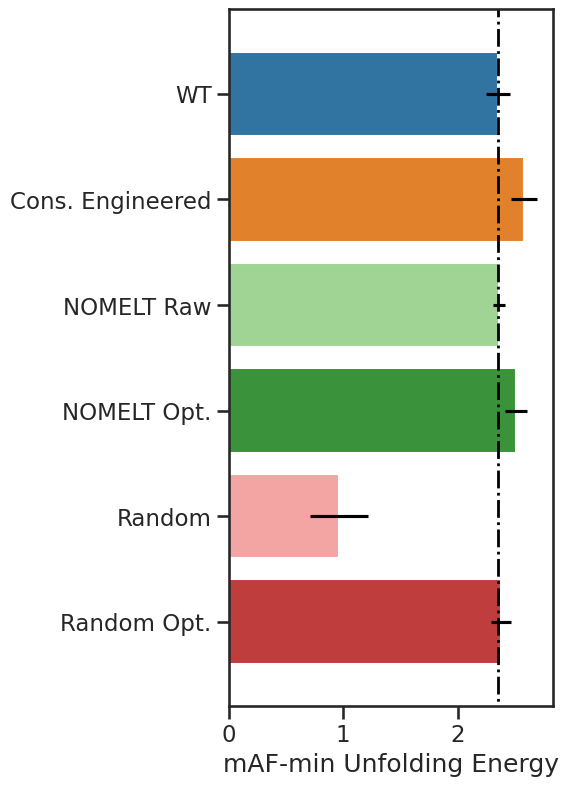

In [19]:
fig, ax = plt.subplots(figsize=(3,8))
fig.tight_layout(rect=[0,0,1.5,1]) 
custom_palette = ["#1f77b4", "#ff7f0e", "#98df8a", "#2ca02c", '#ff9896', '#d62728']
sns.set_palette(custom_palette)
sns.barplot(
    data=data,
    y='name',
    x='score',
    xerr=data['score_std']*2,
    errwidth=2,
    palette=custom_palette,
    ax=ax
)

ax.vlines(x=-wt_e[0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', ls='-.', transform=ax.get_xaxis_transform(), lw=2)
ax.set_ylabel('')
ax.set_xlabel('mAF-min Unfolding Energy')
plt.savefig('./figures/mAF_scores.png', dpi=400, bbox_inches='tight')

### Get some statistics

In [27]:
import scipy.stats

In [28]:
scipy.stats.ttest_ind_from_stats(wt_e[0], wt_e[1], 25, cons_e[0], cons_e[1], 25, alternative='greater')

Ttest_indResult(statistic=14.520171602354035, pvalue=1.7291533499298127e-19)

In [29]:
scipy.stats.ttest_ind_from_stats(wt_e[0], wt_e[1], 25, opt_e_best[0], opt_e_best[1], 25, alternative='greater')

Ttest_indResult(statistic=11.045755203254187, pvalue=4.417680493209814e-15)

### Show structures now

align structures

In [20]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

get sequences from mda

In [21]:
# Get sequence
three_to_one = {
    'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D',
    'CYS': 'C', 'GLU': 'E', 'GLN': 'Q', 'GLY': 'G',
    'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K',
    'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S',
    'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
}

def do_one(u):
    sequence = ''
    for res in u.residues:
        sequence += three_to_one.get(res.resname, 'X')
    return sequence

In [22]:
data['seq'] = data['struct'].apply(lambda f: do_one(mda.Universe(f)))

In [23]:
from nomelt.thermo_estimation.optimizer import OptTrajSuperimposer

In [24]:
imposer = OptTrajSuperimposer(data['seq'], data['struct'], values=range(len(data)))

In [25]:
imposed_structs = imposer.run()

/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:775: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [26]:
views = {}
for i, (_, s) in enumerate(data.iterrows()):
    print(s['name'])
    u = mda.Universe(imposed_structs[i])
    view = nv.show_mdanalysis(u)
    views[s['name']] = view

/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


WT
Cons. Engineered
NOMELT Raw
NOMELT Opt.
Random
Random Opt.


/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/mmfs1/gscratch/cheme/usr/evankomp/mamba/mambaforge/envs/nomelt2/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:451: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [45]:
views['WT']

NGLWidget()

In [46]:
views['Cons. Engineered']

NGLWidget()

In [47]:
views['NOMELT Raw']

NGLWidget()

In [48]:
views['NOMELT Opt.']

NGLWidget()

In [49]:
views['Random']

NGLWidget()

In [50]:
views['Random Opt.']

NGLWidget()